In [1]:
# lib import
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

2022-01-08 09:59:03.875954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-08 09:59:03.875969: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


11501568/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

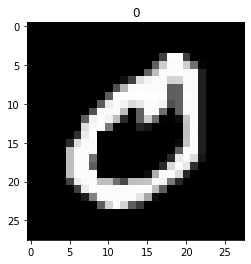

In [2]:
# getting data and auto division between training and test
(X_training, y_training), (X_test, y_test) = mnist.load_data()
# specific images view 
plt.imshow(X_training[21], cmap = 'gray')
plt.title(y_training[21])

In [3]:
# changing dimensions 
X_training = X_training.reshape((len(X_training), np.prod(X_training.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# changing data to float
X_training = X_training.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# Normalization 
X_training /= 255
X_test /= 255

In [6]:
# transforming to dummy
y_training = np_utils.to_categorical(y_training, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# neural network structure  784 - 64 - 64 - 64 - 10
# Use dropout to reset neuron, avoid overfitting 
model = Sequential()
model.add(Dense(units = 64, activation = 'relu', input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
#exit layer 
model.add(Dense(units = 10, activation = 'softmax'))

2022-01-08 09:59:06.552836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-08 09:59:06.552858: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-08 09:59:06.552876: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (GUIMS-manjaro): /proc/driver/nvidia/version does not exist
2022-01-08 09:59:06.553067: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# neural network structure 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [9]:
# configure parameters and training
# at storic we have all the past executions
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historic = model.fit(X_training, y_training, epochs = 20,
                       validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4464 - accuracy: 0.8640 - val_loss: 0.1680 - val_accuracy: 0.9493
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2286 - accuracy: 0.9338 - val_loss: 0.1339 - val_accuracy: 0.9599
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1904 - accuracy: 0.9447 - val_loss: 0.1226 - val_accuracy: 0.9634
Epoch 4/20
1875/1875 [==============================] - 2s 976us/step - loss: 0.1657 - accuracy: 0.9532 - val_loss: 0.1100 - val_accuracy: 0.9661
Epoch 5/20
1875/1875 [==============================] - 2s 994us/step - loss: 0.1514 - accuracy: 0.9563 - val_loss: 0.1012 - val_accuracy: 0.9715
Epoch 6/20
1875/1875 [==============================] - 2s 987us/step - loss: 0.1408 - accuracy: 0.9593 - val_loss: 0.0969 - val_accuracy: 0.9724
Epoch 7/20
1875/1875 [==============================] - 2s 985us/step - loss: 0.1309 - accuracy: 0.9613 - val_loss: 0.1009 - val_a

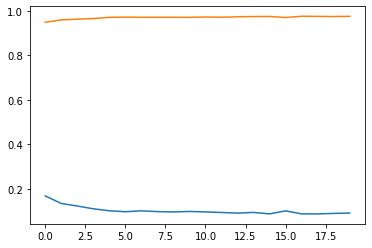

In [10]:
# error and accuracy chart 
historic.history.keys()
#error evolution 
plt.plot(historic.history['val_loss'])
#performance
plt.plot(historic.history['val_accuracy'])

In [11]:
# previsions
previsions = model.predict(X_test)
previsions

array([[3.9368113e-14, 1.8117652e-10, 6.1572938e-09, ..., 9.9997687e-01,
        2.0863769e-12, 2.1618220e-05],
       [1.6751238e-10, 7.6924425e-06, 9.9996579e-01, ..., 1.2638405e-07,
        6.3845306e-08, 1.2583615e-12],
       [3.1815251e-13, 9.9999964e-01, 7.7921936e-09, ..., 4.6217899e-08,
        2.1794294e-07, 5.9014540e-09],
       ...,
       [2.8430584e-13, 3.3307818e-10, 3.5100729e-09, ..., 6.5911884e-08,
        2.6473382e-10, 4.4829528e-07],
       [8.6107404e-17, 2.5982974e-16, 9.0142161e-15, ..., 2.3638731e-16,
        7.5041110e-12, 3.6164818e-11],
       [6.2729252e-11, 1.2490788e-19, 2.3762359e-13, ..., 2.3057416e-17,
        8.6014014e-13, 7.4181986e-16]], dtype=float32)

In [12]:
# confusion matrix generation valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_test_matriz = [np.argmax(t) for t in y_test]
y_previsions_matriz = [np.argmax(t) for t in previsions]
confusion = confusion_matrix(y_test_matriz, y_previsions_matriz)
confusion

array([[ 964,    0,    2,    1,    1,    0,    3,    4,    3,    2],
       [   0, 1124,    3,    1,    0,    2,    3,    1,    1,    0],
       [   3,    4, 1007,    1,    4,    0,    3,    7,    3,    0],
       [   0,    0,    3,  994,    0,    2,    0,    5,    3,    3],
       [   0,    1,    4,    0,  965,    0,    4,    0,    1,    7],
       [   2,    0,    0,   11,    1,  861,    6,    2,    5,    4],
       [   2,    3,    1,    1,    6,    4,  939,    0,    2,    0],
       [   1,    5,    9,    0,    2,    0,    0, 1003,    1,    7],
       [   6,    1,    1,    4,    5,    5,   10,    6,  934,    2],
       [   0,    4,    0,    7,   20,    2,    0,    6,    1,  969]])

In [13]:
# predicting a new register , converting matrix to vector
#number 4
y_training[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
#pass same position to model 
new = X_training[20]
#form matrix to vector
new = np.expand_dims(new, axis = 0)
#prediction
pred = model.predict(new)
#higher value
pred = [np.argmax(pred) for t in pred]
pred

[4]